<a href="https://colab.research.google.com/github/singhr08-cpu/Test/blob/main/BlueSky_Booking_Systems_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BlueSky Airlines Booking Systems

In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Known data for the problem
Capacity = 200           # plane capacity (# of seats)
Booking_Limit_SS = 120   # booking limit for SS class

Price_FF = 850   # price for SS (Super Saver)
Price_SS = 350   # price for FF (Full Fare)

In [ ]:
# read the data from an Excel file
df = pd.read_csv("BlueSky_Demand_Data.csv", index_col = 0)
display(df)

,Demand_SS,Demand_FF
0,170,63
1,137,45
2,188,83
3,123,21
4,21,38
...,...,...
995,185,71
996,133,53
997,123,60
998,103,82


# Q1
## Calculate the mean and standard deviation of demands

In [ ]:
# set up the demands equal to the mean of the distribution
mean_SS = np.mean(df["Demand_SS"])
mean_FF = np.mean(df["Demand_FF"])

# set up the demands equal to the mean of the distribution
std_SS = np.std(df["Demand_SS"])
std_FF = np.std(df["Demand_FF"])

# print the results
print(f"The mean SS demand is {mean_SS:.2f} and stdev for SS demand {std_SS:,.2f}")
print(f"The mean FF demand is {mean_FF:.2f} and stdev for FF demand {std_FF:,.2f}")

The mean SS demand is 129.55 and stdev for SS demand 44.67
The mean FF demand is 55.43 and stdev for FF demand 19.94


## Scatter plot of demands

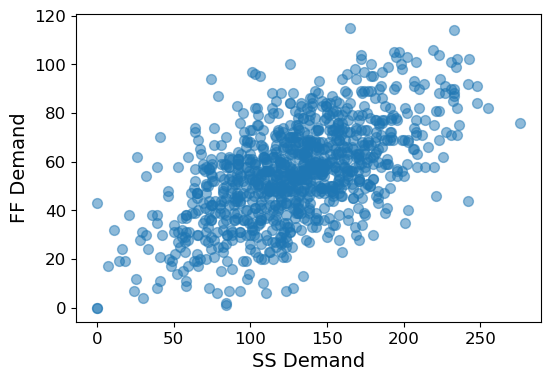

In [ ]:
# Scatter plot of price and demand
plt.figure(figsize=(6,4))
plt.scatter(x=df["Demand_SS"], y=df["Demand_FF"], marker='.', s=200, alpha=0.5)
plt.xlabel("SS Demand", fontsize=14)
plt.ylabel("FF Demand", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Clearly, the demands are positively correlated. We can even calculate the correlation coefficient:

In [ ]:
# calculate and print the correlation coefficient
print(f'The correlation coefficient: {df["Demand_FF"].corr(df["Demand_SS"]):.2f}')

The correlation coefficient: 0.57


# Q2

We define a function to calculate the revenue below. There are a few steps:
 1. We first calculate the sales (i.e., the number of bookings) for each fare class. The bookings for SS cannot exceed the **booking limit for SS**, so the expression for these is:<br>
  $\mbox{Sales SS} = \min(\mbox{Demand SS}, \mbox{Booking Limit SS})$
 2. In view of this, the number of seats that remain available for FF is exactly:<br>
  $\mbox{Remaining seats for FF} = \mbox{Plane Capacity} - \mbox{Sales SS}$
 3. Lastly, the bookings for FF cannot exceed the **remaining seats available for SS**, so the expression for these is:<br>
  $\mbox{Sales FF} = \min(\mbox{Demand FF}, \mbox{Remaining seats for FF})$

For our subsequent purposes, it is very helpful to define the function in as flexible of a manner as possible. In this sense, it is best to allow our function to take as arguments not just the two demand values, but also the other problem parameters (`Capacity`, `BookingLimit`, etc.) That is why below, we define a function with the following syntax:

 > `calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, Booking_Limit_SS=120)`

where:
 - `Demand_SS` is the value of SS demand.
 - `Demand_FF` is the value of FF demand.
 - `Capacity` is the plane capacity; the syntax `Capacity=200` means that the default value of this argument is 200.<br>
   _This means that we can omit the argument when calling the function, and if we omit it, it will take value 200 inside the function._
 - `Price_SS`, `Price_FF` are the SS and FF fares, respectively; by default, 350 and 850, respectively.
 - `Booking_Limit_SS` is the booking limit for SS fares; by default, 120.

The function returns the revenue calculated under the corresponding parameters.

In [ ]:
### A function that calculates revenue for a given full set of problem parameters
# Note how we add all other parameters here, with *default values*
def calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, Booking_Limit_SS=120):
    # calculate the bookings (sales) in each category
    Sales_SS = min(Demand_SS, Booking_Limit_SS)        # this formula assumes that Booking_Limit_SS <= Capacity
    Sales_FF = min(Demand_FF, Capacity - Sales_SS)

    # calculate the revenue
    Revenues_SS = Sales_SS * Price_SS
    Revenues_FF = Sales_FF * Price_FF
    Revenue = Revenues_SS + Revenues_FF

    # return the revenue
    return Revenue

**Note that when calling the function above, we do not need to pass arguments that are set by _default_ such as `Capacity`, `Price_SS`, `Price_FF` or `BookingLimit`. If we omit such an argument, it will take the value specified in the definition of the function (e.g., the `Capacity` would be 200).**

Now let's evaluate the function when demands are equal to their means.

In [ ]:
## Let's set the demands equal to their means
revenue_Q2 = calculate_revenue(Demand_SS = np.mean(df["Demand_SS"]), Demand_FF = np.mean(df["Demand_FF"]))

## Print the results
print(f"The revenue when demands equal their means is ${revenue_Q2:,.2f}.")

The revenue when demands equal their means is $89,116.35.


Note how when calling the function, we only specify two arguments, for the demands. That is because all the other arguments can stay at their default values.

# Q3

Now we use the model from **Q2** to calculate the revenue for every historical sample of data.

We use a for loop to go through the data and we show two ways to store the results: (i) in a numpy array and (i) in the dataframe itself (as another column).

In [ ]:
## Initialize a numpy array of zeros where we will store the revenue calculation
# the length is the number of rows in the dataframe
revenue_values = np.zeros(len(df))

Next, we loop through the rows of the dataframe and calculate the revenue in each sample. We choose to loop with the index (which, conveniently, is 0, 1, ...)

In [ ]:
## loop through every sample of data
for sample in df.index:

    ## calculate the revenue in that sample
    revenue_val = calculate_revenue(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"])

    ## store the revenue in the numpy array
    # Note that we can use 'sample' here because it takes values 0, 1, ... (exactly as the numeric index that we need to index in the array!)
    revenue_values[sample] = revenue_val

    ## we also store this in the dataframe itself - makes for nicer printing and plotting...
    df.loc[sample, "Revenue"] = revenue_val

Lastly, let's calculate and print the **mean revenue**.

In [ ]:
print(f"The mean revenue estimated from the samples is: {np.mean(revenue_values):,.2f}.")

The mean revenue estimated from the samples is: 83,617.25.


You can also print a glimpse of the dataframe, which now includes the revenue calculations.

In [ ]:
# print dataframe
df.head(10)

,Demand_SS,Demand_FF,Revenue
0,170,63,95550.0
1,137,45,80250.0
2,188,83,110000.0
3,123,21,59850.0
4,21,38,39650.0
5,160,79,109150.0
6,151,60,93000.0
7,100,26,57100.0
8,98,68,92100.0
9,72,33,53250.0


# Q4
The parameters from the case

In [ ]:
## The data on demand distributions
mean_SS = 130
stdev_SS = 45
mean_FF = 55
stdev_FF = 20

We do a Monte-Carlo simulation where we generate the values of SS and FF demands, and then we calculate anything needed (e.g., revenue, number of SS customers turned away, etc.)

## Monte-Carlo simulation model

We can store the demand samples and the calculations in any data structure: in lists, in numpy arrays, as columns in a dataframe. Below, we store them as numpy arrays because these are faster to work with.

In [ ]:
## set up the number of trials and the seed
num_trials = 10000

# set up a random number generator with seed 12345
rng = np.random.default_rng(seed=12345)

# set up numpy arrays to store the values of the demand samples (not critical, but good practice!)
# MC below is mnemonic for "Monte-Carlo", so we don't confuse our variables with the earlier ones
SS_dem_vals_MC = np.zeros(num_trials)
FF_dem_vals_MC = np.zeros(num_trials)

# set up a numpy array in which to store the values for the revenues (this could also be a regular python list)
revenue_values = np.zeros(num_trials)

# for Q4, we must also determine how many SS customers are turned away
SS_turned_away = np.zeros(num_trials)

### Run the simulation:
for i in range(num_trials):

    ### generate values for the two demands
    # Note: we take max(,0) to make these positive, and then np.round to round the value
    SS_dem_vals_MC[i] = np.round(max(0,rng.normal(mean_SS, stdev_SS)))
    FF_dem_vals_MC[i] = np.round(max(0,rng.normal(mean_FF, stdev_FF)))

    # calculate the revenue using the function, for the current sample
    revenue_values[i] = calculate_revenue(Demand_SS=SS_dem_vals_MC[i], \
                                          Demand_FF=FF_dem_vals_MC[i], Booking_Limit_SS=120)

    # also determine whether (1/0) SS customers are turned away
    SS_turned_away[i] = (SS_dem_vals_MC[i] > Booking_Limit_SS)

<font color=red>**IMPORTANT NOTE.**</font> Above, we decided to generate the samples of SS and FF demands inside the `for` loop. Another option might be to generate these samples with a call to the function `rng.normal` where we specify a third parameter, for the number of samples. Although this is perfectly fine, you should be aware that the two options **will not result in the same values of FF and SS demands as what we got above, even if you set the same seed for the random number generator**!

For instance, consider the following alternative:

In [ ]:
# set up a random number generator with seed 12345
rng = np.random.default_rng(seed=12345)

### Generate all the demand samples for SS in one shot
# NOTE: We need to use np.maximum(.) to take maximum component by component
SS_dem_vals_MC_2 = np.round(np.maximum(0,rng.normal(mean_SS, stdev_SS, num_trials)))

# Generate all the demand samples for FF in one shot
FF_dem_vals_MC_2 = np.round(np.maximum(0,rng.normal(mean_SS, stdev_SS, num_trials)))

# print the first 3 values of SS demand with the first option and second option
print("SS demand values option 1:", SS_dem_vals_MC[0:3])
print("SS demand values option 2:", SS_dem_vals_MC_2[0:3])

SS demand values option 1: [ 66.  91. 127.]
SS demand values option 2: [ 66. 187.  91.]


Note how only the first element is the same, but they subsequently differ. The reason is that the order in which random values are generated is important: note that in **option 1**, we are generating one sample from SS and then one from FF, etc, whereas with **option 2**, we generate all samples of SS and then all samples of FF.

**When estimating quantities with Monte-Carlo simulation, such differences should not matter provided you have a sufficiently large number of samples. But just be aware of the difference!**

## Generate the histogram of the revenues

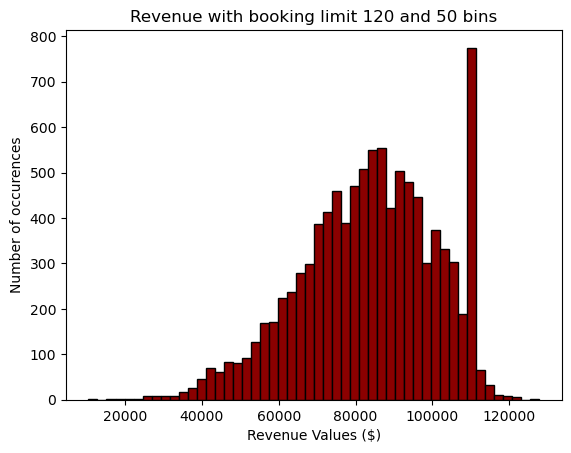

In [ ]:
nbins = 50
plt.hist(revenue_values, bins=nbins, color="darkred", edgecolor="black")
plt.xlabel("Revenue Values ($)")
plt.ylabel("Number of occurences")
plt.title(f"Revenue with booking limit {Booking_Limit_SS} and {nbins} bins")
plt.show()

## (i) Calculate Probability for Revenue

First, let's store the threshold value 100K in a variable

In [ ]:
rev_threshold = 100000

To calculate the probability that the revenue exceeds $100,000, we can loop through the numpy array `revenue_values` and use an **if** statement to determine the number of times this holds.

A more elegant way is to use Python's ability to deal with logical conditions for an entire sequence of values. A condition like `x > 10` where `x` is a sequence (numpy array, list, etc.) will return a sequence of `True/False` depending on whether the condition holds for each element of the sequence.

Moreover, you can use numpy's `sum` for the resulting sequence and numpy will conveniently treat the `True` as 1 and the `False` as 0. This gives a very concise syntax:

In [ ]:
# use numpy's functionality to directly estimate
probability = np.sum(revenue_values > rev_threshold)/len(revenue_values)

print(f"The estimated probability that revenue exceeds 100K is {100*probability:.2f}%")

The estimated probability that revenue exceeds 100K is 19.87%


You are of course **not** expected to remember such things. And in case you need to look for options, you always have chatbots available. For instance, for this example, try prompting a chatbot with something like:<br>
 > _What is the most efficient way to calculate the number of instances where a conditon holds if the condition depends on the values of a numpy array?_

## (ii) Probability of turning SS customers away

Note that our `for` loop above already conveniently calculated and stored the results in the numpy array `SS_turned_away`, which indicates (0/1) whether SS customers are turned away. We just need to estimate the probability, i.e., the fraction of samples where this happens:

In [ ]:
## Calculate the probability
probab_turn_away = np.sum(SS_turned_away)/num_trials

## Display as percent
print(f'The estimated probability that SS customers are turned away is {probab_turn_away*100:.2f}%')

The estimated probability that SS customers are turned away is 59.60%


Because we stored the SS demands, we can also calculate this directly without using `SS_turned_away`, as follows:

In [ ]:
## Calculate the probability directly, without using `SS_turned_away`
probab_turn_away = np.sum( SS_dem_vals_MC > Booking_Limit_SS )/num_trials
print(f'The estimated probability that SS customers are turned away is {100*probab_turn_away:.2f}%')

The estimated probability that SS customers are turned away is 59.60%


# Q5
To calculate the optimal booking limit, we will test values of the booking limit from 0 to `Capacity` and for every such value, we will calculate the **mean** revenue using the demand samples that we generated.

## Brute-Force Approach

The most immediate ("brute-force") approach here would be the following:
 - have an outer `for` loop that considers values for `Booking_Limit_SS` from 0 to `Capacity` in increments of 1
 - have an inner `for` loop that goes through all the 10,000 demand samples and calculates the `mean_revenue`
 - pick the booking limit that results in the largest mean revenue.

The code would like like the one below. Note that we commented out the line that test values for booking limits from 0 to 200 because **it would take a REALLY long time to finish** with 201 test values for the booking limit and 10,000 samples! (Instead, we "cheat" here and test values from 120 to 160, which happens to contain the optimal value... but normally, you would need to run this for every test value!)

In [ ]:
## values to test for the booking limit
#booking_limit_values = np.arange(0,Capacity+1,1)
booking_limit_values = np.arange(120,160,1)

## set up numpy array to store the values for mean revenue
mean_revenue_values = np.zeros(len(booking_limit_values))

## Outer for loop that tests different values for the booking limit
for i in range(len(booking_limit_values)):

    # array to store the revenue calculation for each sample
    revenue_values = np.zeros(num_trials)

    # Inner for loop that goes through all demand samples
    # Here, we use the demand samples that we generated earlier
    for s in range(num_trials):
        ## calculate and store the revenue in that sample
        # CRITICALLY, note that we now pass a third argument to the function - the booking limit!
        revenue_values[s] = calculate_revenue(Demand_SS = SS_dem_vals_MC[s],\
                                              Demand_FF = FF_dem_vals_MC[s],\
                                              Booking_Limit_SS = booking_limit_values[i])

    ## Calculate and store the mean revenue in the numpy array
    mean_revenue_values[i] = np.mean(revenue_values)

## Finally, we can calculate the optimal (i.e., maximum) mean revenue and the optimal booking limit value (that maximizes the mean revenue)
optimal_revenue = np.max(mean_revenue_values)
optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal booking limit is: {optimal_booking_limit:.2f}")

The optimal revenue is: 85,305.43
The optimal booking limit is: 141.00


## A Smarter Approach and More Functions
A more elegant approach is to define the function suggested in the solution. Here, we first define an intermediate function that calculates the `mean revenue` given two demand sequences. You could of course skip this step and directly write the overall bigger function, but breaking things up into smaller and "more digestable" pieces of code is usually good practice.

This intermediate function has the syntax:
> `calculate_mean_revenue(SS_demands, FF_demands, Booking_Limit_SS=120, Capacity=200, Price_SS=350, Price_FF=850):`

In [ ]:
def calculate_mean_revenue(SS_demands, FF_demands, \
                           Booking_Limit_SS = 120, Capacity=200, Price_SS=350, Price_FF=850):
    # array to store the revenue calculation for each sample
    revenue_values = np.zeros(len(SS_demands))

    # Inner for loop that goes through all demand samples
    for i in range(len(SS_demands)):
        ## calculate and store the revenue in that sample
        revenue_values[i] = calculate_revenue(Demand_SS = SS_demands[i],\
                                              Demand_FF = FF_demands[i], \
                                              Booking_Limit_SS=Booking_Limit_SS)
    # return the mean revenue
    return np.mean(revenue_values)

Using this, we can now define the bigger function that determines an optimal booking limit in a certain range and with a certain step-size.

In [ ]:
def get_optimal_booking_limit_and_revenue(SS_demands, FF_demands, \
                                          min_booking_limit, max_booking_limit, step,\
                                          Capacity=200, Price_SS=350, Price_FF=850):
    # values to test for the booking limit
    booking_limit_values = np.arange(min_booking_limit, max_booking_limit + step, step)

    # array to zero mean revenues
    mean_revenue_values = np.zeros(len(booking_limit_values))

    # for loop to test the different values for the booking limit
    for i in range(len(booking_limit_values)):

        # calculate the **mean** revenue and store it
        mean_revenue_values[i] = calculate_mean_revenue(SS_demands=SS_demands, FF_demands=FF_demands,\
                                                        Booking_Limit_SS=booking_limit_values[i])

    # Finally, calculate the optimal mean revenue and the optimal booking limit value
    optimal_revenue = np.max(mean_revenue_values)
    optimal_booking_limit = booking_limit_values[np.argmax(mean_revenue_values)]

    return optimal_booking_limit, optimal_revenue

With this, we can now implement a smarter search procedure:
  - first consider fewer values for the booking limit by discretizing with larger step sizes.
  - identify where the maximum value occurs
  - consider the two proximal values to the maximum among the initial test values and rediscretize in that range with a smaller step
  - repeat as needed this until you achieve the desired precision.

_For instance, we could start with values from 0 to 200 in increments of 20. Suppose the maximum occurs at a booking limit of 60. We would consider the range 40 to 80 (the closest values to the maximum from the ones we tested initially) and discretize in increments of 1. (If that is too wide of a range, we could use a large step size and repeat again.)_

**The major caveat with this new method is that it is <font color=red>not guaranteed to find the global optimal solution</font> (i.e., the best solution among all possible ones). That is only the case in some models that have "good structure" and we will talk more about these during our class; but for now, let me just say that our model does have this structure, so we can apply this method! You will see how it cuts down the time substantially below!**

With this caveat, let's use the function we just defined with a wide range and large steps first.

In [ ]:
# get optimal booking limit with range 0 to 200 in steps of 20
opt_book_lim, opt_rev = \
get_optimal_booking_limit_and_revenue(SS_demands=SS_dem_vals_MC, \
                                      FF_demands=FF_dem_vals_MC, \
                                      min_booking_limit=0, max_booking_limit=200, step=20)

print(f"The optimal revenue is: {opt_rev:,.2f}")
print(f"The optimal booking limit is: {opt_book_lim:.2f}")

The optimal revenue is: 85,302.51
The optimal booking limit is: 140.00


Optimum occurs between 140-20=120 and 140+20=160, so we can search again in this interval in steps of 1.

In [ ]:
# get optimal booking limit with range 120 to 160 in steps of 1
opt_book_lim, opt_rev = \
get_optimal_booking_limit_and_revenue(SS_demands=SS_dem_vals_MC, \
                                      FF_demands=FF_dem_vals_MC, \
                                      min_booking_limit=120, max_booking_limit=160, step=1)

print(f"The optimal revenue is: {opt_rev:,.2f}")
print(f"The optimal booking limit is: {opt_book_lim:.2f}")

The optimal revenue is: 85,305.43
The optimal booking limit is: 141.00


# Q6

Here, we must model the number of SS customers who buy up using a Binomial Random variable.

In [ ]:
# the probability that an SS customer who is turned away "buys up"
probBuyUp = 0.3

Here, we write a function similar to the last one in **Q5** but we embed all the necessary calculations (including generating the demand samples via Monte-Carlo) inside it. The reason is that in order to generate a sample for the number of SS customers who buy-up, we need to know how many SS customers are turned away! So the calculation must be done for each sample.

In [ ]:
# booking limit
Booking_Limit_SS = 141

# reset the seed for the random number generator to 12345
rng = np.random.default_rng(seed=12345)

# array to store the revenue calculation for each sample
revenue_values = np.zeros(num_trials)

# inner for loop that generates all the demand samples
for i in range(num_trials):

    Demand_SS = np.round(max(0,rng.normal(mean_SS, stdev_SS)))
    Demand_FF = np.round(max(0,rng.normal(mean_FF, stdev_FF)))

    # calculate the sales/bookings for SS
    Sales_SS = min(Demand_SS, Booking_Limit_SS)

    # determine if there are any customers who buy up
    if Demand_SS > Booking_Limit_SS :
        # some customers were turned away
        Buy_Up_Demand = rng.binomial(Demand_SS - Sales_SS, probBuyUp)   # sample from a binomial random variable
    else :
        Buy_Up_Demand = 0

    # calculate sales for FF, including the new demand stream from buy-ups
    Sales_FF = min(Demand_FF + Buy_Up_Demand, Capacity - Sales_SS)

    # record the value for the revenue
    revenue_values[i] = Sales_SS*Price_SS + Sales_FF*Price_FF

# calculate the **mean** revenue and print it
print(f"The mean revenue is: {np.mean(revenue_values):,.2f}")

The mean revenue is: 86,665.98


# Q7

The new parameters/data.

In [ ]:
# the probability that SS customer shows up
prob_show_up = 0.90

# the coupon given to super savers who are denied boarding
coupon = 300

## VIRTUAL CAPACITY: we fix this to 225 for now
virtual_cap = 220

We model overbooking by including a virtual capacity, which is a new **decision** that the airline makes corresponding to how many tickets to sell in total. As before, the booking limit still corresponds to the maximum number of SS tickets sold. But now, the total bookings can exceed the plan capacity and go up to the **virtual capacity**.

In [ ]:
# we write a function that takes as input the booking limit
def examine_Q7(Booking_Limit_SS=141, virtual_cap=220):

    # reset the seed for the random number generator to 12345
    rng = np.random.default_rng(seed=12345)

    # array to store the revenue calculation for each sample
    net_revenue_values = np.zeros(num_trials)

    # inner for loop that generates all the demand samples
    for t in range(num_trials):

        Demand_SS = np.round(max(0,rng.normal(mean_SS, stdev_SS)))
        Demand_FF = np.round(max(0,rng.normal(mean_FF, stdev_FF)))

        # calculate the sales/bookings for SS
        Sales_SS = min(Demand_SS, Booking_Limit_SS)

        # calculate how many SS customers show up
        if Sales_SS > 0:
            SS_show_up = rng.binomial(Sales_SS, prob_show_up)

        # calculate sales for FF: note that here, we use the VIRTUAL CAPACITY rather than the real capacity!
        Sales_FF = min(Demand_FF, virtual_cap - Sales_SS)

        ## determine whether any SS customers must be denied boarding
        # IMPORTANT: here, we use the actual plane capacity
        SS_denied = max( SS_show_up + Sales_FF - Capacity, 0)

        # calculate the revenue for tickets but subtract the coupons
        net_revenue_values[t] = Sales_SS*Price_SS + Sales_FF*Price_FF - SS_denied*coupon

    # calculate the **mean** revenue and print it
    #print(f"The revenue net of coupon costs is: {np.mean(net_revenue_values):,.2f}")
    return np.mean(net_revenue_values)

Now check what happens with Booking Limit of 141 (optimal in Q5) versus a bit larger (we try 145)

In [ ]:
# calculate the **mean** revenue and print it
print(f"The optimal revenue net of coupon costs with booking limit 141 is: {examine_Q7(Booking_Limit_SS=141):,.2f}")
print(f"The optimal revenue net of coupon costs with booking limit 145 is: {examine_Q7(Booking_Limit_SS=145):,.2f}")

The optimal revenue net of coupon costs with booking limit 141 is: 87,157.23
The optimal revenue net of coupon costs with booking limit 145 is: 87,492.51


## Optimize the virtual capacity

The following is not required in the case, but we can even optimize over the virtual capacity.

In [ ]:
## VIRTUAL CAPACITY: this is a decision for the airline
virtual_cap_values = np.arange(220,290,1)

# mean revenue values (one for every virtual capacity)
mean_net_revenues = np.zeros(len(virtual_cap_values))

## For loop over different virtual capacity values
for i in range(len(virtual_cap_values)):
    # assign the virtual capacity
    virtual_cap = virtual_cap_values[i]

    # calculate the **mean** revenue and store it
    mean_net_revenues[i] = examine_Q7(Booking_Limit_SS=141, virtual_cap=virtual_cap)

## Calculate the optimal virtual capacity and resulting revenue
optimal_revenue = np.max(mean_net_revenues)
optimal_virtual_cap = virtual_cap_values[np.argmax(mean_net_revenues)]
print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal virtual capacity is: {optimal_virtual_cap:.2f}")

The optimal revenue is: 87,470.30
The optimal virtual capacity is: 270.00


## Optimize the virtual capacity AND the booking limit

Now let's optimize over both booking limit AND virtual capacity.

In [ ]:
## VIRTUAL CAPACITY: this is a decision for the airline
virtual_cap_values = np.arange(270,290,5)

## BOOKING LIMIT values
booking_lim_values = np.arange(140,220,5)

# mean revenue values (one for every virtual capacity)
mean_net_revenues = np.zeros((len(virtual_cap_values),len(booking_lim_values)))

## For loop over different virtual capacity values
for i in range(len(virtual_cap_values)):
    # assign the virtual capacity
    virtual_cap = virtual_cap_values[i]

    for j in range(len(booking_lim_values)):
        book_lim_val = booking_lim_values[j]

        # calculate the **mean** revenue and store it
        mean_net_revenues[i,j] = examine_Q7(Booking_Limit_SS=book_lim_val, virtual_cap=virtual_cap)

## Calculate the optimal virtual capacity and resulting revenue
optimal_revenue = np.max(mean_net_revenues)

max_index_flat = np.argmax(mean_net_revenues)
max_index = np.unravel_index(max_index_flat, mean_net_revenues.shape)

optimal_virtual_cap = virtual_cap_values[max_index[0]]
optimal_booking_lim = booking_lim_values[max_index[1]]
print(f"The optimal revenue is: {optimal_revenue:,.2f}")
print(f"The optimal virtual capacity is: {optimal_virtual_cap:.2f}")
print(f"The optimal booking limit is: {optimal_booking_lim:.2f}")

The optimal revenue is: 89,998.21
The optimal virtual capacity is: 285.00
The optimal booking limit is: 210.00
